In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [2]:
train = ImageDataGenerator(rescale= 1/255.0) #divides each pix value by 255
validation = ImageDataGenerator(rescale = 1/255.0)

In [3]:
train_dataset = train.flow_from_directory("dataset\\CompleteDataset\\train\\",
                                            target_size= (48, 48),
                                            batch_size = 7,
                                            color_mode='grayscale')  
validation_dataset = validation.flow_from_directory("dataset\\CompleteDataset\\validation\\",
                                            target_size= (48, 48),
                                            batch_size = 7,
                                            color_mode='grayscale') 
                                            


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [4]:
train_dataset.class_indices  #this class convets the class string into numbers, as neural network cannot take strings, so it converts all the classes names into a numerical value

#validation_dataset.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [5]:
#train_dataset.classes #Shows the lables assigned to the images of the classes as classes are given values 0, 1 and 2
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(2,2), activation = "relu", input_shape = (48,48,1)),
    tf.keras.layers.MaxPool2D(
        pool_size=(2,2),
        strides = 1,),
    #
    tf.keras.layers.Conv2D(32,(2,2), activation = "relu"),
    tf.keras.layers.MaxPool2D(
        pool_size=(2,2),
        strides = 1,),
    #
    tf.keras.layers.Conv2D(64,(2,2), activation = "relu"),
    tf.keras.layers.MaxPool2D(
        pool_size=(2,2),
        strides = 1,),
    ##
    ##
    tf.keras.layers.Conv2D(128,(2,2), activation = "relu"),
#     tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.GlobalAveragePooling2D(),
    
    ##
    tf.keras.layers.Flatten(),
    ##
    tf.keras.layers.Dense(512, activation = "relu"),
    ##
    tf.keras.layers.Dense(7, activation = "softmax")])

model.summary()

e:\Ihsan Data\Github Repos\Python\Computer Vision\facial-expression-recognition\.visionEnv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 47, 47, 16)     │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 46, 46, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 45, 45, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 44, 44, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 43, 43, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 41, 41, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,951 (441.21 KB)

 Trainable params: 112,951 (441.21 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# tf.keras.losses.CategoricalCrossentropy(
# from_logits=false, label_smoothing=0,axis=-1, reduction=losses.utils.ReductionV2.AUTO, name = "categorical)crossentropy")

model.compile(loss= tf.keras.losses.categorical_crossentropy,
             optimizer = "adam",
             metrics = ["accuracy"])

In [7]:
model_fit = model.fit( train_dataset,
                     steps_per_epoch = 5,
                     epochs = 5,
                     validation_data = validation_dataset)

e:\Ihsan Data\Github Repos\Python\Computer Vision\facial-expression-recognition\.visionEnv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 26s 6s/step - accuracy: 0.0857 - loss: 1.9389 - val_accuracy: 0.2583 - val_loss: 1.9246
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.2857 - loss: 1.9120 - val_accuracy: 0.2583 - val_loss: 1.8945
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.2571 - loss: 1.8967 - val_accuracy: 0.2583 - val_loss: 1.8676
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 25s 6s/step - accuracy: 0.2286 - loss: 1.8792 - val_accuracy: 0.2583 - val_loss: 1.8535
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.2571 - loss: 1.8363 - val_accuracy: 0.2583 - val_loss: 1.8475


In [28]:
from PIL import Image
import glob
import shutil

cam = cv2.VideoCapture(0)
cv2.namedWindow("test")
img_counter = 0

while True:
    ret, frame = cam.read()
    if not ret:
        print("failed to grab frame")
        break
    cv2.imshow("test", frame)

    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        img_name = "test_image_{}.png".format(img_counter) 
        path = 'test\\'
        cv2.imwrite(os.path.join(path , img_name), frame)
#         shutil.move("C:\\Users\\Ihsan Ullah\\FRS\\FRS via Data Generator\\" , "C:\\Users\\Ihsan Ullah\\FRS\\FRS via Data Generator\\basedata\\Uni Class\\testing\\ihsan\\")
        print("{} written!".format(img_name))
        img_counter += 1

cam.release()
cv2.destroyAllWindows()



test_image_0.png written!
Escape hit, closing...


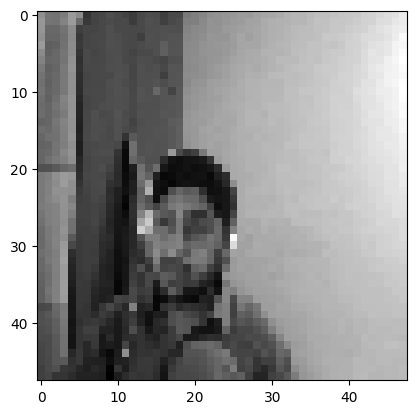

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
surprise


In [29]:
dir_path = "test\\\\"
for i in os.listdir(dir_path):
    # Load image as grayscale
    img = image.load_img(dir_path + "\\\\" + i, target_size=(48,48), color_mode='grayscale')
    plt.imshow(img, cmap='gray')  # Use grayscale colormap for display
    plt.show()
    
    X = image.img_to_array(img)
    X = X / 255.0  # Normalize like your training data
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    
    # Get the predicted class (use argmax since it's multi-class)
    predicted_class = np.argmax(val, axis=1)[0]
    
    if predicted_class == 0:
        print("angry")
    elif predicted_class == 1:
        print("disgust")
    elif predicted_class == 2:
        print("fear")
    elif predicted_class == 3:
        print("happy")
    elif predicted_class == 4:
        print("neutral")
    elif predicted_class == 5:
        print("sad")
    elif predicted_class == 6:
        print("surprise")